**оценка классификатора**


Евгений Борисов borisov.e@solarl.ru

---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_wine


---

In [28]:
data = load_wine()

print( list(data.keys()) )
# print( data['target_names'] )
print( data['DESCR'] )

['data', 'target', 'target_names', 'DESCR', 'feature_names']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                         

---

In [29]:
X = data['data']
y = data['target']

X.shape, y.shape

((178, 13), (178,))

In [41]:
# убираем третий класс
y = np.array([ min(c,1) for c in y ])

---

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.8)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35, 13), (35,), (143, 13), (143,))

In [43]:
%xdel X
%xdel y
%xdel data

---

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(metric='euclidean')

clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
r = clf.predict(X_test)


---

In [46]:
from sklearn.metrics import  accuracy_score

accuracy_score(y_test,r)

0.9230769230769231

In [47]:
from sklearn.metrics import classification_report

print( classification_report(y_test,r) )

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        44
           1       0.95      0.94      0.94        99

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,r)
print(cm)

[[39  5]
 [ 6 93]]


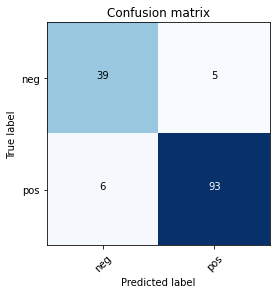

In [49]:
import itertools

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

plt.title('Confusion matrix')
# plt.colorbar()

classes=['neg','pos']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

---

In [50]:
p = clf.predict_proba(X_test)

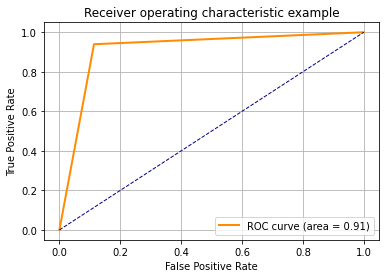

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve( y_test, p[:,1] )
roc_auc = auc(fpr,tpr)

plt.figure()
plt.grid(True)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()